## **70028 - Reinforcement Learning: Coursework 1**
### Belfiore Asia, 02129867
---

In [29]:
import numpy as np 
import random
import matplotlib.pyplot as plt # Graphical library

In [2]:
# Helper Function to plot the agent (MC and TD) learning curve
def plot_learning_curve(maze, agent, agent_type, total_runs, num_episodes = 5000):
    mean_per_run = np.zeros((total_runs, num_episodes))

    for run in range(total_runs):
        _, _, rewards = agent.solve(maze)
        mean_per_run[run] = rewards

    x = [_ for _ in range(1, num_episodes+1)]
    y = np.mean(mean_per_run, axis=0)
    std = np.std(mean_per_run, axis=0)

    # Plot mean (solid line) and standard deviation (shaded)
    plt.plot(x, y, label="Mean", color='navy')
    plt.fill_between(x, y-std, y+std, label="STD", color="cornflowerblue", alpha=0.6)
    
    plt.title(f"{agent_type} Agent Learning Rate:\n")
    plt.xlabel("Number of Episodes")  
    plt.ylabel("Non-discounted Sum of Rewards")  

    plt.legend(loc="lower right")
    plt.show()

# Coursework 1 :
See pdf for instructions. 

In [3]:
# WARNING: fill in these two functions that will be used by the auto-marking script
# [Action required]

def get_CID():
  return "02129867" # Return your CID (add 0 at the beginning to ensure it is 8 digits long)

def get_login():
  return "ab6124" # Return your short imperial login

## Helper class

In [4]:
# This class is used ONLY for graphics
# YOU DO NOT NEED to understand it to work on this coursework

class GraphicsMaze(object):

  def __init__(self, shape, locations, default_reward, obstacle_locs, absorbing_locs, absorbing_rewards, absorbing):

    self.shape = shape
    self.locations = locations
    self.absorbing = absorbing

    # Walls
    self.walls = np.zeros(self.shape)
    for ob in obstacle_locs:
      self.walls[ob] = 20

    # Rewards
    self.rewarders = np.ones(self.shape) * default_reward
    for i, rew in enumerate(absorbing_locs):
      self.rewarders[rew] = 10 if absorbing_rewards[i] > 0 else -10

    # Print the map to show it
    self.paint_maps()

  def paint_maps(self):
    """
    Print the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders)
    plt.show()

  def paint_state(self, state):
    """
    Print one state on the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    states = np.zeros(self.shape)
    states[state] = 30
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders + states)
    plt.show()

  def draw_deterministic_policy(self, Policy):
    """
    Draw a deterministic policy
    input: Policy {np.array} -- policy to draw (should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, action in enumerate(Policy):
      if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
        continue
      arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
      action_arrow = arrows[action] # Take the corresponding action
      location = self.locations[state] # Compute its location on graph
      plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
    plt.show()

  def draw_policy(self, Policy):
    """
    Draw a policy (draw an arrow in the most probable direction)
    input: Policy {np.array} -- policy to draw as probability
    output: /
    """
    deterministic_policy = np.array([np.argmax(Policy[row,:]) for row in range(Policy.shape[0])])
    self.draw_deterministic_policy(deterministic_policy)

  def draw_value(self, Value):
    """
    Draw a policy value
    input: Value {np.array} -- policy values to draw
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, value in enumerate(Value):
      if(self.absorbing[0, state]): # If it is an absorbing state, don't plot any value
        continue
      location = self.locations[state] # Compute the value location on graph
      plt.text(location[1], location[0], round(value,2), ha='center', va='center') # Place it on graph
    plt.show()

  def draw_deterministic_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple deterministic policies
    input: Policies {np.array of np.array} -- array of policies to draw (each should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Policies)): # Go through all policies
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each policy
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, action in enumerate(Policies[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
          continue
        arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
        action_arrow = arrows[action] # Take the corresponding action
        location = self.locations[state] # Compute its location on graph
        plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graph given as argument
    plt.show()

  def draw_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policies (draw an arrow in the most probable direction)
    input: Policy {np.array} -- array of policies to draw as probability
    output: /
    """
    deterministic_policies = np.array([[np.argmax(Policy[row,:]) for row in range(Policy.shape[0])] for Policy in Policies])
    self.draw_deterministic_policy_grid(deterministic_policies, title, n_columns, n_lines)

  def draw_value_grid(self, Values, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policy values
    input: Values {np.array of np.array} -- array of policy values to draw
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Values)): # Go through all values
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each value
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, value in enumerate(Values[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any value
          continue
        location = self.locations[state] # Compute the value location on graph
        plt.text(location[1], location[0], round(value,1), ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graoh given as argument
    plt.show()


## Maze class

In [5]:
# This class define the Maze environment

class Maze(object):

  # [Action required]
  def __init__(self):
    """
    Maze initialisation.
    input: /
    output: /
    """
    
    # Q0 [Action required]
    # Properties set from the CID
    self._prob_success = 0.8 + (0.02 * (9.0 - float(get_CID()[6]))) # float 
    self._gamma = 0.8 + (0.02 * float(get_CID()[6])) # float
    self._goal = int(get_CID()[7]) % 4 # integer (0 for R0, 1 for R1, 2 for R2, 3 for R3)

    # Build the maze
    self._build_maze()
                              

  # Functions used to build the Maze environment 
  # You DO NOT NEED to modify them
  def _build_maze(self):
    """
    Maze initialisation.
    input: /
    output: /
    """

    # Properties of the maze
    self._shape = (13, 10)
    self._obstacle_locs = [
                          (1,0), (1,1), (1,2), (1,3), (1,4), (1,7), (1,8), (1,9), \
                          (2,1), (2,2), (2,3), (2,7), \
                          (3,1), (3,2), (3,3), (3,7), \
                          (4,1), (4,7), \
                          (5,1), (5,7), \
                          (6,5), (6,6), (6,7), \
                          (8,0), \
                          (9,0), (9,1), (9,2), (9,6), (9,7), (9,8), (9,9), \
                          (10,0)
                         ] # Location of obstacles
    self._absorbing_locs = [(2,0), (2,9), (10,1), (12,9)] # Location of absorbing states
    self._absorbing_rewards = [ (500 if (i == self._goal) else -50) for i in range (4) ]
    self._starting_locs = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9)] #Reward of absorbing states
    self._default_reward = -1 # Reward for each action performs in the environment
    self._max_t = 500 # Max number of steps in the environment

    # Actions
    self._action_size = 4
    self._direction_names = ['N','E','S','W'] # Direction 0 is 'N', 1 is 'E' and so on
        
    # States
    self._locations = []
    for i in range (self._shape[0]):
      for j in range (self._shape[1]):
        loc = (i,j) 
        # Adding the state to locations if it is no obstacle
        if self._is_location(loc):
          self._locations.append(loc)
    self._state_size = len(self._locations)

    # Neighbours - each line is a state, ranked by state-number, each column is a direction (N, E, S, W)
    self._neighbours = np.zeros((self._state_size, 4)) 
    
    for state in range(self._state_size):
      loc = self._get_loc_from_state(state)

      # North
      neighbour = (loc[0]-1, loc[1]) # North neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('N')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('N')] = state

      # East
      neighbour = (loc[0], loc[1]+1) # East neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('E')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('E')] = state

      # South
      neighbour = (loc[0]+1, loc[1]) # South neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('S')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('S')] = state

      # West
      neighbour = (loc[0], loc[1]-1) # West neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('W')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('W')] = state

    # Absorbing
    self._absorbing = np.zeros((1, self._state_size))
    for a in self._absorbing_locs:
      absorbing_state = self._get_state_from_loc(a)
      self._absorbing[0, absorbing_state] = 1

    # Transition matrix
    self._T = np.zeros((self._state_size, self._state_size, self._action_size)) # Empty matrix of domension S*S*A
    for action in range(self._action_size):
      for outcome in range(4): # For each direction (N, E, S, W)
        # The agent has prob_success probability to go in the correct direction
        if action == outcome:
          prob = 1 - 3.0 * ((1.0 - self._prob_success) / 3.0) # (theoritically equal to self.prob_success but avoid rounding error and garanty a sum of 1)
        # Equal probability to go into one of the other directions
        else:
          prob = (1.0 - self._prob_success) / 3.0
          
        # Write this probability in the transition matrix
        for prior_state in range(self._state_size):
          # If absorbing state, probability of 0 to go to any other states
          if not self._absorbing[0, prior_state]:
            post_state = self._neighbours[prior_state, outcome] # Post state number
            post_state = int(post_state) # Transform in integer to avoid error
            self._T[prior_state, post_state, action] += prob

    # Reward matrix
    self._R = np.ones((self._state_size, self._state_size, self._action_size)) # Matrix filled with 1
    self._R = self._default_reward * self._R # Set default_reward everywhere
    for i in range(len(self._absorbing_rewards)): # Set absorbing states rewards
      post_state = self._get_state_from_loc(self._absorbing_locs[i])
      self._R[:,post_state,:] = self._absorbing_rewards[i]

    # Creating the graphical Maze world
    self._graphics = GraphicsMaze(self._shape, self._locations, self._default_reward, self._obstacle_locs, self._absorbing_locs, self._absorbing_rewards, self._absorbing)
    
    # Reset the environment
    self.reset()


  def _is_location(self, loc):
    """
    Is the location a valid state (not out of Maze and not an obstacle)
    input: loc {tuple} -- location of the state
    output: _ {bool} -- is the location a valid state
    """
    if (loc[0] < 0 or loc[1] < 0 or loc[0] > self._shape[0]-1 or loc[1] > self._shape[1]-1):
      return False
    elif (loc in self._obstacle_locs):
      return False
    else:
      return True


  def _get_state_from_loc(self, loc):
    """
    Get the state number corresponding to a given location
    input: loc {tuple} -- location of the state
    output: index {int} -- corresponding state number
    """
    return self._locations.index(tuple(loc))


  def _get_loc_from_state(self, state):
    """
    Get the state number corresponding to a given location
    input: index {int} -- state number
    output: loc {tuple} -- corresponding location
    """
    return self._locations[state]

  # Getter functions used only for DP agents
  # You DO NOT NEED to modify them
  def get_T(self):
    return self._T

  def get_R(self):
    return self._R

  def get_absorbing(self):
    return self._absorbing

  # Getter functions used for DP, MC and TD agents
  # You DO NOT NEED to modify them
  def get_graphics(self):
    return self._graphics

  def get_action_size(self):
    return self._action_size

  def get_state_size(self):
    return self._state_size

  def get_gamma(self):
    return self._gamma

  # Functions used to perform episodes in the Maze environment
  def reset(self):
    """
    Reset the environment state to one of the possible starting states
    input: /
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """
    self._t = 0
    self._state = self._get_state_from_loc(self._starting_locs[random.randrange(len(self._starting_locs))])
    self._reward = 0
    self._done = False
    return self._t, self._state, self._reward, self._done

  def step(self, action):
    """
    Perform an action in the environment
    input: action {int} -- action to perform
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """

    # If environment already finished, print an error
    if self._done or self._absorbing[0, self._state]:
      print("Please reset the environment")
      return self._t, self._state, self._reward, self._done

    # Drawing a random number used for probaility of next state
    probability_success = random.uniform(0,1)

    # Look for the first possible next states (so get a reachable state even if probability_success = 0)
    new_state = 0
    while self._T[self._state, new_state, action] == 0: 
      new_state += 1
    assert self._T[self._state, new_state, action] != 0, "Selected initial state should be probability 0, something might be wrong in the environment."

    # Find the first state for which probability of occurence matches the random value
    total_probability = self._T[self._state, new_state, action]
    while (total_probability < probability_success) and (new_state < self._state_size-1):
     new_state += 1
     total_probability += self._T[self._state, new_state, action]
    assert self._T[self._state, new_state, action] != 0, "Selected state should be probability 0, something might be wrong in the environment."
    
    # Setting new t, state, reward and done
    self._t += 1
    self._reward = self._R[self._state, new_state, action]
    self._done = self._absorbing[0, new_state] or self._t > self._max_t
    self._state = new_state
    return self._t, self._state, self._reward, self._done

## DP Agent

In [31]:
# This class define the Dynamic Programing agent 
class DP_agent(object):

  def policy_eval(self, env, gamma, policy, threshold = 0.0001):
    """
    Policy Evaluation Step
    input: 
      - env {Maze object} -- Maze to solve
      - gamma {np.array} -- Discount Factor
      - policy {float} -- Current Policy
      - threshold {float} -- Default 0.0001                 
    output: 
      - V {np.array} -- Updated Value function 
    """
    # Environment Description
    state_size = env.get_state_size() 
    action_size = env.get_action_size() 
    T = env.get_T()
    R = env.get_R()
    absorbing = env.get_absorbing()

    # Initialisation
    V = np.zeros(env.get_state_size()) # Initialise value function to 0
    delta = threshold*2   # random initialization of delta > threshold
    V_eval = np.copy(V)
    
    while (delta > threshold):

      for state in range(state_size): # loop through every state in the maze
        if not absorbing[0, state]: # only evaluate policy for non-terminal (curent) states
          v = 0 

          for action in range(action_size): 
            state_action = 0
            for next_state in range(state_size):
              state_action += T[state, next_state, action] * (R[state, next_state, action] + (gamma * V[next_state]))
            v += (policy[state, action] * state_action)
            
          V_eval[state] = v
      
      delta = max(abs(V_eval - V))
      V = np.copy(V_eval)

    return V
  

  def policy_iteration(self, env, gamma):
    """
    Policy Improvement Step
    input: 
      - env {Maze object} -- Maze to solve
      - gamma {np.array} -- Discount Factor
    output: 
      - policy {np.array} -- Optimal Policy ze
      - V {np.array} -- Optimal State Values
    """
    # Environment Description
    state_size = env.get_state_size() 
    action_size = env.get_action_size() 
    T = env.get_T()
    R = env.get_R()
    absorbing = env.get_absorbing()

    # Policy and Value Initialisation
    policy = np.zeros((state_size, action_size)) 
    policy[:, 1] = 1  # start action = 1
    # V = np.zeros(state_size)

    policy_stable = False 
    while not policy_stable: 
      # 1) Policy Evaluation
      V = self.policy_eval(env, gamma, policy)
      # 2) Policy Improvement
      policy_stable = True
      for state in range(state_size): 
        if not absorbing[0, state]: # only for non-terminal states
          old_action = np.argmax(policy[state, :]) 
          state_optimal = np.zeros(action_size)

          for next_state in range(state_size): 
            state_optimal += T[state, next_state, :] * (R[state, next_state, :] + (gamma * V[next_state]))
      
          new_state_policy = np.zeros(action_size)
          new_state_policy[np.argmax(state_optimal)] = 1  # set value of best action to 1, others to 0
          policy[state, :] = new_state_policy

          if old_action != np.argmax(policy[state, :]):
            policy_stable = False

    return policy, V
  

  # Q1 [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):
    """
    Solve a given Maze environment using Dynamic Programming
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - V {np.array} -- Corresponding Value function 
    """   

    #### 
    # Add your code here
    # WARNING: for this agent only, you are allowed to access env.get_T(), env.get_R() and env.get_absorbing()
    ####
    gamma = env.get_gamma() # Discount Factor
    # gamma = 2.0  # Q1c)

    policy, V = self.policy_iteration(env, gamma)

    return policy, V

## MC agent

In [36]:
# This class define the Monte-Carlo agent

class MC_agent(object):

  def improve_greedy_policy(self, state_size, action_size, Q, t, epsilon = 0.4, decay_rate = 0.9995): 
    """
    Update the Optimal Policy following the epsilon-greedy approach
    input: 
      - state_size {int} -- number of states in the maze
      - action_size {int} -- number of possible actions (4) per state
      - Q {np.array} -- Optimal policy found to solve the given Maze environment 
      - t {int} -- current episode (for epsilon decay)
      - epsilon (ε) {float} -- parameter for (epsilon) ε-greedy action (defaults to 0.4)
      - decay_rate {float} -- decaying rate of epsilon (defaults to 0.9995)
    output: 
      - greedy_policy {np.array} -- Updated greedy policy  
    """
    greedy_policy = np.zeros((state_size, action_size))

    epsilon = epsilon * pow(decay_rate, t)

    for state in range(state_size): # check optimal action for every state
      for action in range(action_size):
        if action == np.argmax(Q[state, :]): # if current action is optimal action (based on Q function)
          greedy_policy[state, action] = (1 - epsilon) + (epsilon / action_size)
        else:
          greedy_policy[state, action] = epsilon / action_size
    
    return greedy_policy


  def estimate_Q(self, env, Q, episode_steps, times_seen_state_action):
    """ 
    Update Q(s,a) for each tuple (state, action) seen in an episode.
    input: 
      - env {Maze object} -- Maze to solve
      - Q {np.array} -- Current Q Function
      - episode_steps {int} -- List of tuples (state,action,reward) representing 
                                each (time) step of the episode
      - episode_steps {list} -- List of tuples (state,action,reward) representing 
                                each (time) step of the episode
    output: 
      - updated_Q {np.array} -- Updated Q function (off-policy)
      - times_seen_state_action {np.array} -- Track how many times each (state,action)
                                              tuple has been seen throughout every episode
                                              generated so far
      - total_episode_return {float} -- Non-discounted Sum of Rewards collected so far
    """
    updated_Q = np.copy(Q)
    gamma = env.get_gamma() 
    total_episode_return = 0  # keep running sum of all rìcollected rewards in episode
    visited_state_action_pairs = [] # keep track of seen (state,action) pairs
    
    for t,(state, action, reward) in enumerate(episode_steps): # get state-action (and observed reward) at each time step
        total_episode_return += reward
        
        if (state,action) not in visited_state_action_pairs:
          G = 0
          for i,(_,_,reward) in enumerate(episode_steps[t:]):
            G += (reward * pow(gamma, i)) # discounted reward

          times_seen_state_action[state,action] += 1
          # only account for new gain (G-Q(s,a))
          updated_Q[state, action] = Q[state, action] + ((G - Q[state, action])/times_seen_state_action[state,action])
          visited_state_action_pairs.append((state,action))
    
    return updated_Q, times_seen_state_action, total_episode_return
  

  def generate_episode(self, env, policy, action_size):
    """ 
    Generate an episode (trace) keeping track of the states visited,
    actions taken and associated rewards collected
    input: 
      - env {Maze object} -- Maze to solve
      - policy {np.array} -- Current Policy
      - action_size {int} -- number of possible actions (4) for each state
    output: 
      - episode_steps {list} -- List of tuples (state, action, next_reward) of visited states, 
                                actions taken and reward collected during each step of the episode (in order)
    """
    episode_steps = []
    t, state, _, done = env.reset() # start episode    

    while not done:
      # randomly choose action from current state based on current (ε-soft) policy
      action = np.random.choice(range(action_size), p=policy[state, :])
      next_t, next_state, next_reward, done = env.step(action) # move in maze with chosen action
      episode_steps.append((state, action, next_reward)) # store (state, action, reward) tuples for each time step
      t, state = next_t, next_state

    return episode_steps
  

  # [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):
    """
    Solve a given Maze environment using Monte Carlo learning
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - values {list of np.array} -- List of successive value functions for each episode 
      - total_returns {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode 
    """
    state_size = env.get_state_size()
    action_size = env.get_action_size()

    # Initialisation (can be edited)
    Q = np.random.rand(state_size, action_size) 
    policy = self.improve_greedy_policy(state_size, action_size, Q, t=0)
    total_returns = [] # keep track of reward changes
    
    V = np.zeros(state_size)
    values = [V] # keep track of the state value changes
    times_seen_state_action = np.zeros((state_size, action_size))

    #### 
    # Add your code here
    # WARNING: this agent only has access to env.reset() and env.step() (and env.get_gamma())
    # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
    ####

    for t in range(5000): # for each episode
      # 1) generate an episode using current policy
      episode_steps = self.generate_episode(env, policy, action_size) 
      # 2) update Q function based on the sequence of (state,action,reward) seen in the last episode
      Q, times_seen_state_action, sum_collected_rewards = self.estimate_Q(env, Q, episode_steps, times_seen_state_action)
      # 3) update (ε-greedy) policy
      policy = self.improve_greedy_policy(state_size, action_size, Q, t=t)

      values.append(np.max(Q, axis=1)) # approximate V as the best state-action value
      total_returns.append(sum_collected_rewards)
      
    return policy, values, total_returns

## TD agent

In [37]:
# This class define the Temporal-Difference agent

class TD_agent(object):

  def improve_greedy_policy(self, state_size, action_size, Q, t, epsilon = 0.2, decay_rate = 0.9995): 
    """
    Update the Optimal Policy following the epsilon-greedy approach
    input: 
      - state_size {int} -- number of states in the maze
      - action_size {int} -- number of possible actions (4)
      - Q {np.array} -- Optimal policy found to solve the given Maze environment 
      - t {int} -- current time-step (for epsilon decay)
      - epsilon (ε) {float} -- parameter for (epsilon) ε-greedy action (defaults to 0.2)
      - decay_rate {float} -- decaying rate of epsilon (defaults to 0.9995)
    output: 
      - greedy_policy {np.array} -- Updated greedy policy 
    """
    greedy_policy = np.zeros((state_size, action_size))

    epsilon = epsilon * pow(decay_rate, t)

    for state in range(state_size): # check optimal action for every state
      for action in range(action_size):
        if action == np.argmax(Q[state, :]): # if current action is optimal action (based on Q function)
          greedy_policy[state, action] = (1 - epsilon) + (epsilon / action_size)
        else:
          greedy_policy[state, action] = epsilon / action_size
    
    return greedy_policy
  

  def estimate_Q(self, env, Q, state, next_state, action, reward, alpha):
    """ 
    Update Q(s,a) for each (state, action) seen in an episode.
    input: 
      - env {Maze object} -- Maze to solve
      - Q {np.array} -- Current Q Function
      - state {float} -- Current State
      - next_state {float} -- Next State reached from Current state with chosen action
      - reward {float} -- Reward collected upon reaching Next State
      - apha {float} -- Agent learning rate
    output: 
      - updated_Q {np.array} -- Updated Q function (off-policy)
    """
    gamma = env.get_gamma()

    updated_Q = np.copy(Q)
    updated_Q[state,action] = Q[state,action] + (alpha * (reward + ((gamma * Q[next_state, np.argmax(Q[next_state,:])])) - Q[state, action]))
    
    return updated_Q


  def q_learning(self, env, state_size, action_size, policy, Q, episode, alpha, epsilon = 0.2):
    """
    TD (Q-Learning) Process.
    input: 
      - env {Maze object} -- Maze to solve
      - state_size {int} -- number of states in the maze
      - action_size {int} -- number of possible actions (4) per state
      - policy {np.array} -- Current policy  
      - Q {np.array} -- Current Q Function 
      - episode {int} -- current episode number
      - apha {float} -- Agent learning rate
      - epsilon (ε) {float} -- parameter for (epsilon) ε-greedy action (defaults to 0.2)
    output: 
      - total_episode_rewards {list} -- Non-discounted sum of collected reards so far
      - Q {np.array} -- Updated Q function (off-policy)
      - policy {np.array} -- Updated target policy  
    """
    total_episode_rewards = 0

    policy = self.improve_greedy_policy(state_size, action_size, Q, episode, epsilon)
    t, state, _, done = env.reset() # start episode    

    while (not done) and (t<500): 
      # randomly choose action from current state based on current (ε-soft) policy
      action = np.random.choice(range(action_size), p=policy[state, :])

      t, next_state, reward, done = env.step(action) # move in maze with chosen action
      total_episode_rewards += reward

      Q = self.estimate_Q(env, Q, state, next_state, action, reward, alpha)
      policy = self.improve_greedy_policy(state_size, action_size, Q, episode, epsilon)
      state = next_state
    
    return total_episode_rewards, Q, policy
  


  # [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):
    """
    Solve a given Maze environment using Temporal Difference learning
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - values {list of np.array} -- List of successive value functions for each episode 
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode 
    """
    state_size = env.get_state_size()
    action_size = env.get_action_size()

    # Initialisation (can be edited)
    Q = np.random.rand(state_size, action_size) 
    # Q = np.zeros((state_size, action_size)) 
    V = np.zeros(state_size)
    policy = self.improve_greedy_policy(state_size, action_size, Q, t=0)
    values = [V]
    total_rewards = []

    #### 
    # Add your code here
    # WARNING: this agent only has access to env.reset() and env.step()
    # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
    ####

    alpha = 0.2

    for episode in range(3000):
      total_episode_rewards, Q, policy = self.q_learning(env, state_size, action_size, policy, Q, episode, alpha=alpha)
      values.append(np.max(Q, axis=1))
      total_rewards.append(total_episode_rewards)
    
    return policy, values, total_rewards

## Example main

Creating the Maze:



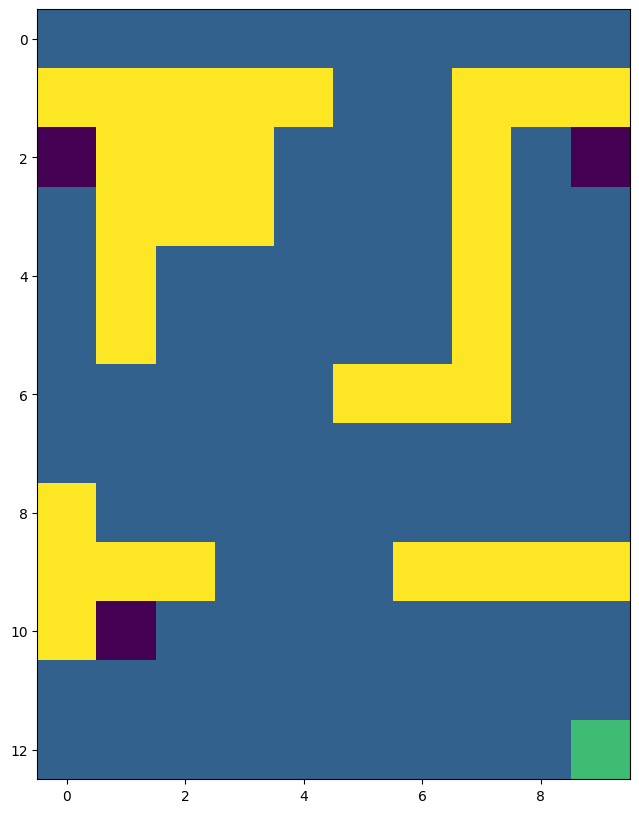

Results of the DP agent:



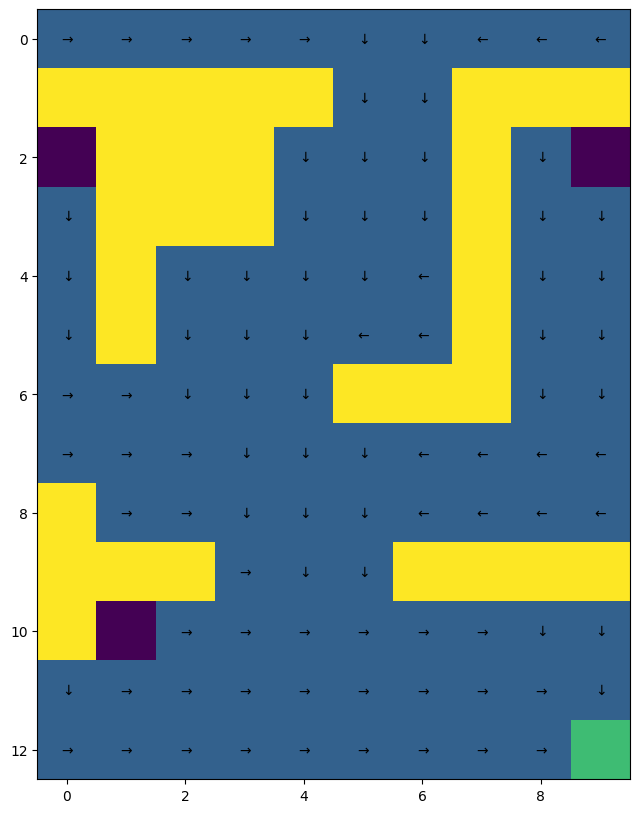

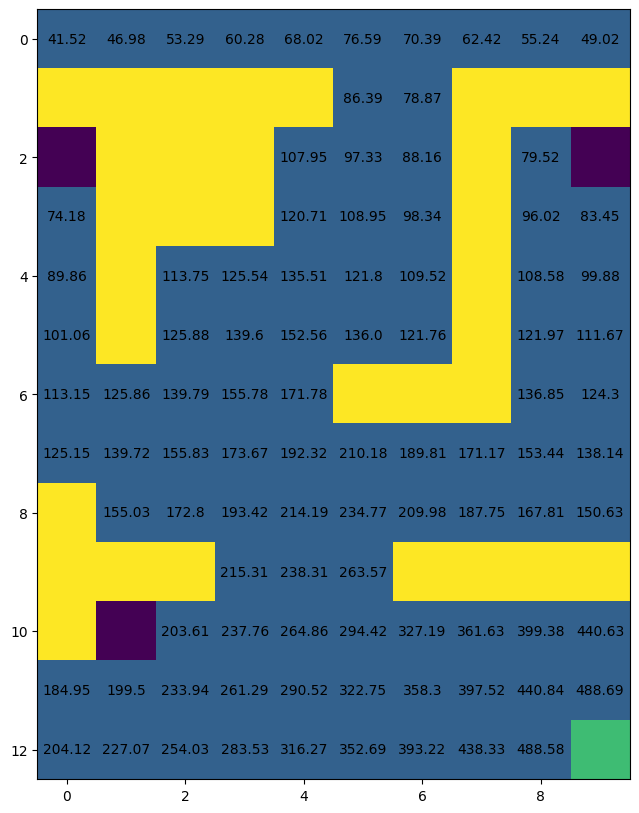

Results of the MC agent:



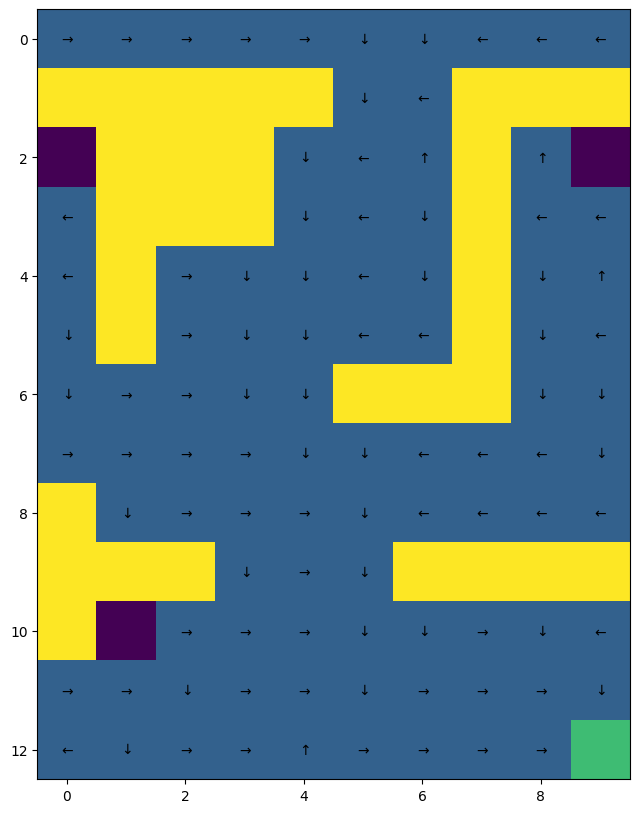

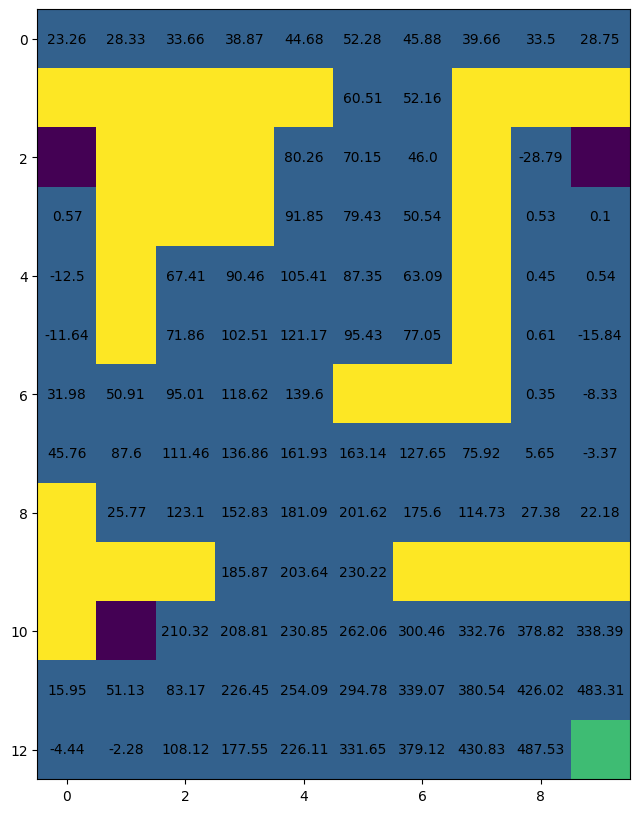

Results of the TD agent:



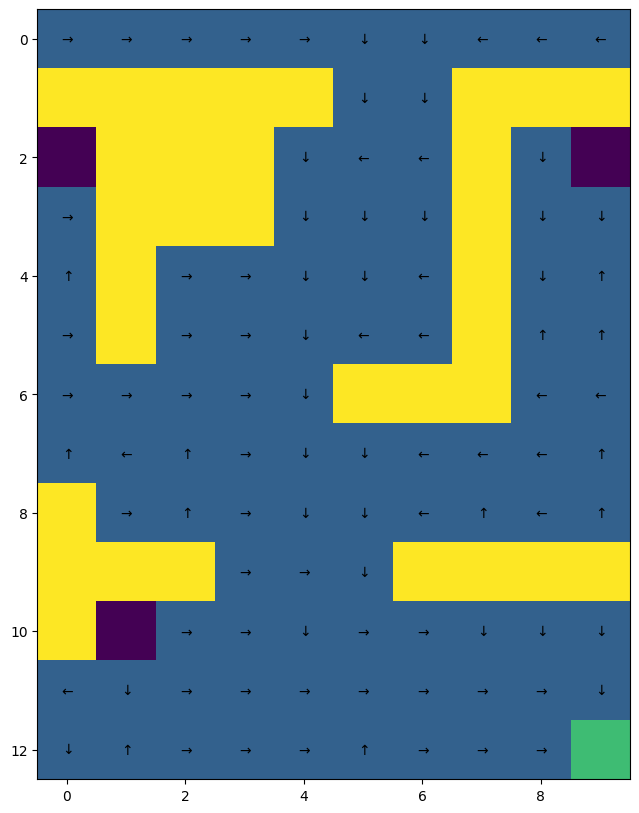

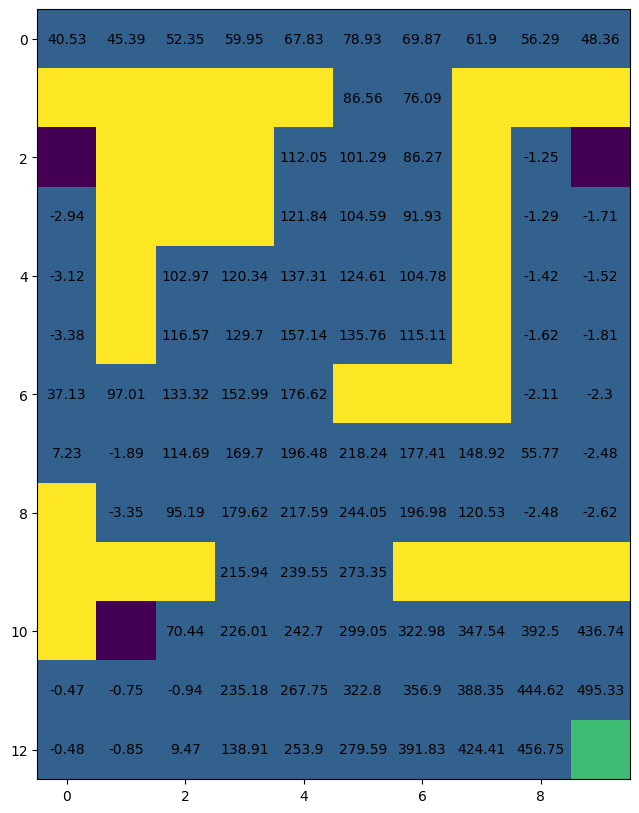

In [38]:
# Example main (can be edited)

### Question 0: Defining the environment

print("Creating the Maze:\n")
maze = Maze()

### Question 1: Dynamic programming
dp_agent = DP_agent()
dp_policy, dp_value = dp_agent.solve(maze)

print("Results of the DP agent:\n")
maze.get_graphics().draw_policy(dp_policy)
maze.get_graphics().draw_value(dp_value)


### Question 2: Monte-Carlo learning
mc_agent = MC_agent()
mc_policy, mc_values, total_rewards = mc_agent.solve(maze)

print("Results of the MC agent:\n")
maze.get_graphics().draw_policy(mc_policy)
maze.get_graphics().draw_value(mc_values[-1])
# plot_learning_curve(maze, agent=mc_agent, agent_type="MC", total_runs=25, num_episodes=5000)


### Question 3: Temporal-Difference learning
td_agent = TD_agent()
td_policy, td_values, total_rewards = td_agent.solve(maze)

print("Results of the TD agent:\n")
maze.get_graphics().draw_policy(td_policy)
maze.get_graphics().draw_value(td_values[-1])
# plot_learning_curve(maze, agent=td_agent, agent_type="TD", total_runs=1, num_episodes=5000)